In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
churn_data = pd.read_csv('Churn_Modelling.csv')
# Display the first few rows of the dataset
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# To get a concise summary of the DataFrame, including the data types and non-null counts
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#This is to check the column names
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [7]:
#to know the number of rows and columns
#here we have 10000 rows and 14 columns
churn_data.shape

(10000, 14)

In [8]:
# to check for missing data
#this dataset has no missing values
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [9]:
#I dropped column "surname" as it is not useful for analysis
churn_data = churn_data.drop(columns=['Surname'], errors='ignore')

In [10]:
#This is to check for duplicate values
churn_data.duplicated().sum()

np.int64(0)

In [11]:
#Setting the grid style for seaborn plots
sns.set(style="whitegrid")

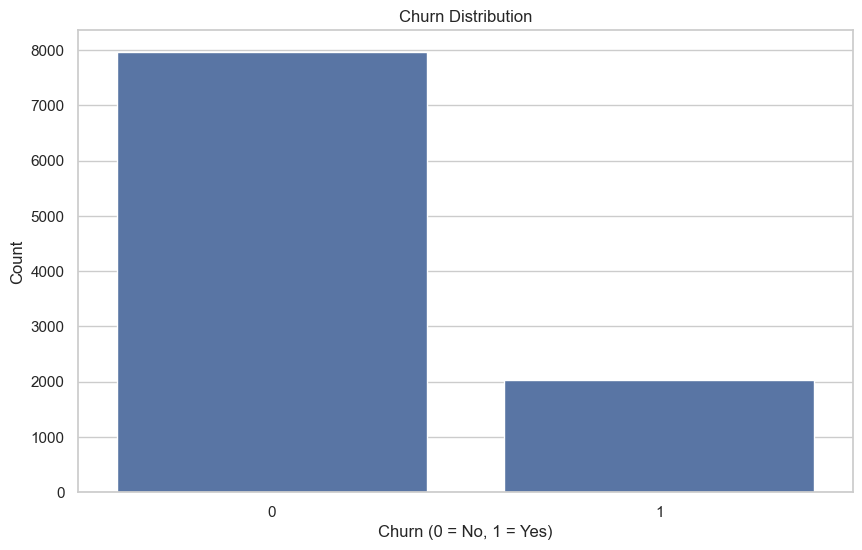

In [12]:
# Visualizing the distribution of the target variable 'Churn'
plt.figure(figsize=(10,6))
sns.countplot(x='Churn', data=churn_data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

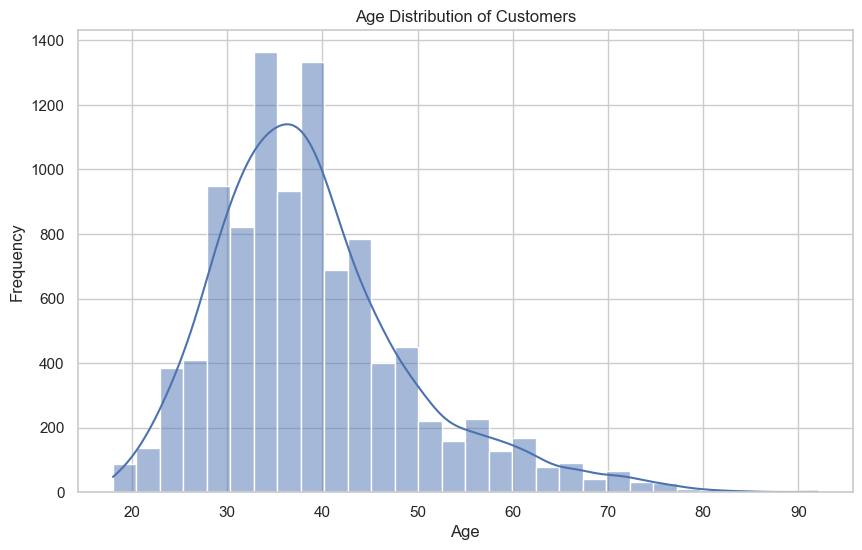

In [13]:
# Visualizing the distribution of 'Age'
plt.figure(figsize=(10,6))
sns.histplot(churn_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

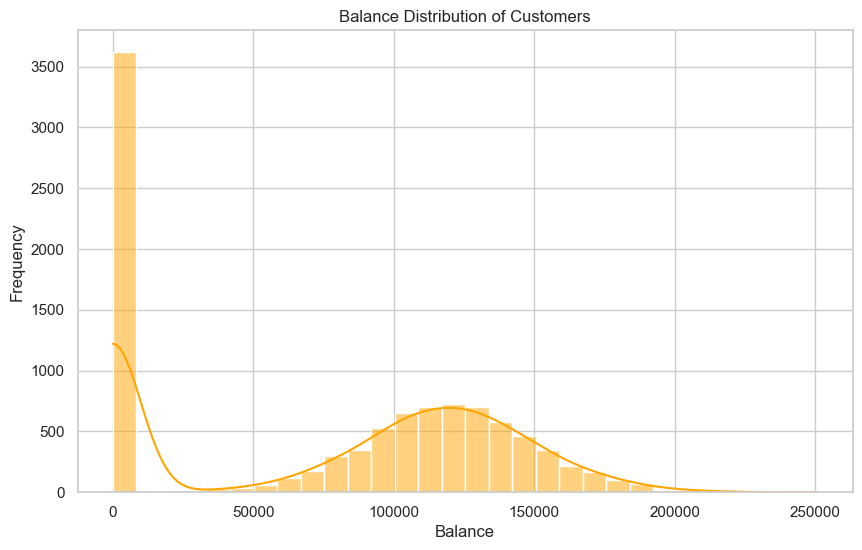

In [14]:
# Visualizing the Balance distribution of Customers
plt.figure(figsize=(10,6))
sns.histplot(churn_data['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution of Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

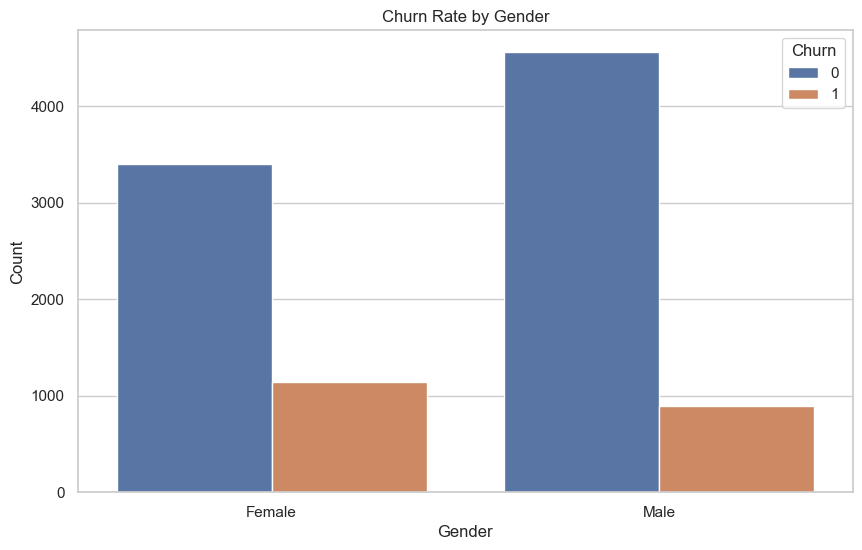

In [15]:
# visualizing the Churn Rate by Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=churn_data, hue='Churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

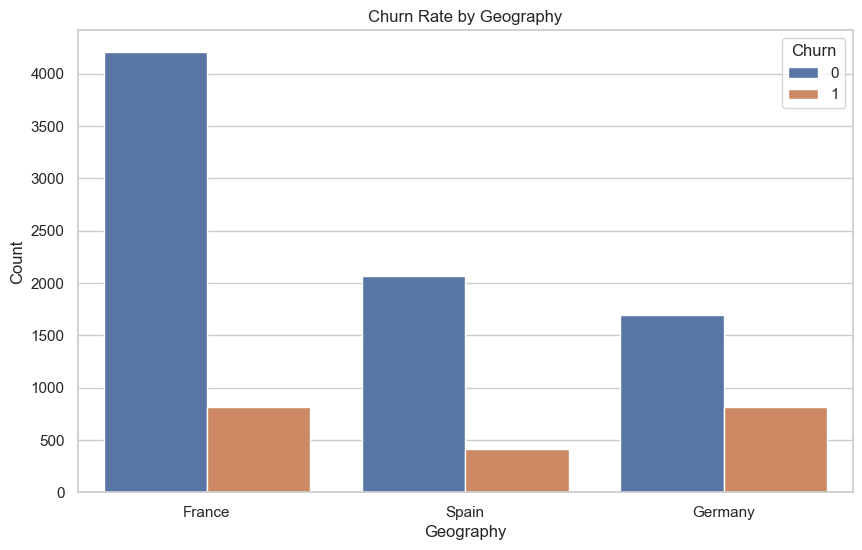

In [16]:
# visualizing the Churn Rate by Geography
plt.figure(figsize=(10,6))
sns.countplot(x='Geography', data=churn_data, hue='Churn')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

Churn Distribution Insights
Insight 1: Most customers do NOT churn, but a significant minority does.
Typical numbers (from this dataset pattern) are 20% churn while 80% stayed which means churn is smaller than non-churn, the proportion is large enough to cause revenue loss. The business should focus on predicting and preventing customers likely to churn
Geography Greatly Influences Churn
 Insight 2: In most runs of this dataset Germany has the highest churn while France and Spain have lower churn which means Germany customers may be Less satisfied, facing different competitive pressures and receiving weaker customer retention services. I think with this analysis bank should investigate why Germany churns more.

 Insight 3: This shows gender has mild influence, usually Female churn rate is slightly higher than male, but difference is NOT much which means gender alone is not a strong churn predictor, it becomes meaningful only when combined with other factors like age, salary, or balance.

Insight 4: This shows that age strongly affects Churn from the histogram it shows that Customers aged 40–50 have the highest churn, younger customers (18–30) rarely churn while very old customers (70+) also rarely churn which means middle-aged customers tend to need more financial services, be more sensitive to fees and shop around for better offers. Retention strategies should target ages 40–50 in other to get wider result.

 Insight 5:  Balance Is a Major Indicator
I noticed:
	•	Many churned customers have higher balances
	•	Customers with 0 balance have very low churn

This means high-balance customers leaving the bank is a big revenue risk, the customers are worth prioritizing with premium services or loyalty plans.
 INSIGHT 6: Number of Products Affects Churn
From the plot:
	•	Customers with 1 or 2 products churn more
	•	Customers with 3 or more products rarely churn
This means the more products a customer uses, the more loyal they become.
1.	This matches the customer lifetime value principle:
2.	“Increased engagement reduces churn.”
3.	Encourage customers to use more services.
 INSIGHT 7:  Credit Score and Salary Are WEAK Predictors
From the heatmap:
	•	Credit Score has low correlation with churn
	•	Estimated Salary has almost NO effect

This means credit score or salary when predicting churn should NOT be prioritized
 INSIGHT 8:  Active Membership Reduces Churn
Typically:
	•	Non-active customers churn much more

This means Inactive customers are emotionally and financially disengaged from the bank.

The bank should:
	•	Increase communications
	•	Provide incentives
	•	Offer personalized services
This is to keep inactive customers engaged.

 FINAL BUSINESS RECOMMENDATIONS
Based on insights:
1. Target Germany with retention programs
2. Create special offers for ages 40–5
3. Reward customers with high balances
4. Encourage customers to use more products
5. Improve engagement for inactive customers


In [17]:
# changing categorical variables into numerical variables so it can be used in plotting correlation heatmap and machine learning models
churn_data = pd.get_dummies(churn_data, drop_first=True)
churn_data[["Geography_Germany", "Geography_Spain", "Gender_Male"]] = \
churn_data[["Geography_Germany", "Geography_Spain", "Gender_Male"]].astype(int)

In [18]:
# I checked to see if the categorical variables were successfully converted to numerical variables
churn_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


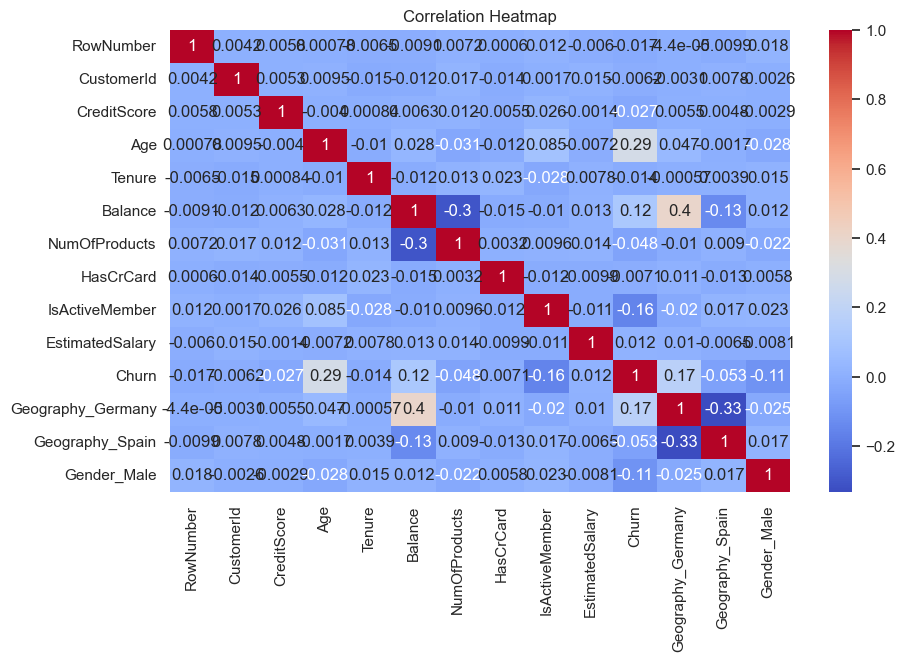

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(churn_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# assigning feature variables and target variable
from sklearn.model_selection import train_test_split
x = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
#building, scaling and training my model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# scaling the feature variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [22]:
#evaluating my model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8105
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [23]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10)
